<a href="https://colab.research.google.com/github/ratikumari227/ML-Basics/blob/main/Dragon_real_estate_price_predictor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes 

1. load data by using drive
2. https://stackoverflow.com/questions/15026698/how-to-make-separator-in-pandas-read-csv-more-flexible-wrt-whitespace-for-irreg

Linear regression to predict the price of real estate 

# Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read data file

In [2]:
import pandas as pd

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dragon Real Estate/housing_data.csv', header=None, delimiter=r"\s+", names=column_names)

In [4]:
# housing.info()

In [5]:
# print(housing.head(5))

In [6]:
# housing['CHAS'].value_counts()

In [7]:
# housing.describe()

In [8]:
# %matplotlib inline
# import matplotlib.pyplot as plt 
# housing.hist( figsize=(20,15))

# Train Test split

In [9]:
# for learning purpose
# import numpy as np
# def split_train_test(data,test_ratio):
#   np.random.seed(42)
#   shuffled = np.random.permutation(len(data))
#   # print(shuffled)
#   test_set_size = int( len(data) * test_ratio)
#   test_indices = shuffled[:test_set_size]
#   train_indices = shuffled[test_set_size:]
#   return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = split_train_test(housing, 0.2)

In [10]:
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
# print(f'rows in train set: {len(train_set)}\nrows in test set: {len(test_set)}')

In [12]:
# stratefied sampling --> the data should contain samples from entire population

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [14]:
# strat_test_set.info()

In [15]:
# strat_test_set['CHAS'].value_counts()

In [16]:
# strat_train_set['CHAS'].value_counts()

In [17]:
# 95/7  

In [18]:
# 376/28

In [19]:
housing=strat_train_set.copy()

# Looking for correlations

In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [22]:
# equal % of 0 and 1 same in both test and train set

In [23]:
from pandas.plotting import scatter_matrix
attributes=['RM','ZN','MEDV','LSTAT']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf3d068690>,
      dtype=object)

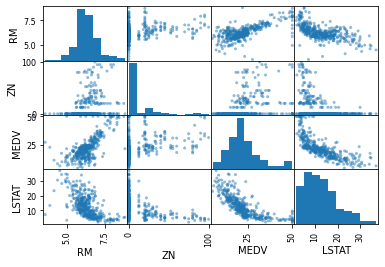

In [24]:
scatter_matrix(housing[attributes])

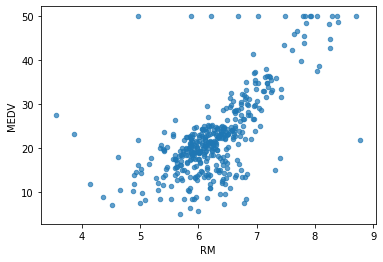

In [25]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.7)

In [26]:

housing=strat_train_set.drop('MEDV',axis=1)
housing_label=strat_train_set['MEDV'].copy()

# Attribute combinations

In [27]:
# housing['TPRM']=housing['TAX']/housing['RM']

In [28]:
# housing['TPRM']
# tax per room

# Missing Attribute


1. get rid of missing data points
2. get rid of whole attribute
3. set the value to some value (0, mean or median)

In [29]:
# 1
housing.dropna(subset=['RM']).shape

(404, 13)

In [30]:
# 2
housing.drop('RM',axis=1).shape

(404, 12)

In [31]:
median=housing['RM'].median()

In [32]:
# 3
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [35]:
imputer.statistics_.shape

(13,)

In [36]:
X=imputer.transform(housing)

In [37]:
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn Design


1. Estimators : It estimates based on some dataset. Eg. Imputer. It has fit() and transform() method. Fit method fits the dataset and calculates the internal parameters.

2. Transformers :  Transform method takes input and returns output based on the learning from the fit() method. It has fit_transform() function.

3. Predictors : Linear Regression model is an example of predictor. It has fit() and predict() function. The score() function evalutes the prediction.


# Feature Scaling

In [38]:
from sklearn.pipeline import Pipeline

1. min-max scaling (normalization) all values lies between 0 and 1


---

    (value-min)/(max-min)

sklearn provides a class called MinMaxScaler for this

---
2. standardization

---
```
(value-min)/std
```
sklearn provides a class called StandardScaler for this

---






# Creating Pipeline

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),
                      # add as many as you want in pipeline
                      ('std_scaler',StandardScaler())
                      ])

In [41]:
housing_num_tr= my_pipeline.fit_transform(housing)
# numpy array predictors use numpy as input

In [42]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

# Selecting desired model for DRAGON REAL ESTATE

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
# model = LinearRegression()
model.fit(housing_num_tr,housing_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
some_data = housing.iloc[:5]

In [45]:
some_labels = housing_label.iloc[:5]

In [46]:
prepared_data = my_pipeline.transform(some_data)

In [58]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [47]:
model.predict(prepared_data)

array([22.428, 25.502, 16.127, 23.404, 23.633])

In [48]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating model

In [49]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)
mse=mean_squared_error(housing_label,housing_predictions)
rmse=np.sqrt(mse)
mse

1.5615875470297023

# Using better evaluation technique - Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_label,scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

In [51]:
rmse_scores

array([2.74114716, 3.61397992, 3.1109984 , 4.05447337, 3.188462  ])

In [52]:
def print_scores(scores):
  print('Scores : ',scores)
  print('Mean : ',scores.mean())
  print('Standard Deviation : ',scores.std())

In [53]:
print_scores(rmse_scores)

Scores :  [2.74114716 3.61397992 3.1109984  4.05447337 3.188462  ]
Mean :  3.3418121701865813
Standard Deviation :  0.4515641695184066


# Saving the model

In [56]:
from joblib import dump,load
dump(model,'DragonRealEstate.joblib')

['DragonRealEstate.joblib']

# Testing the model on test data

In [54]:
X_test = strat_test_set.drop('MEDV',axis=1)
Y_test = strat_test_set['MEDV']
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [55]:
final_rmse

2.89378621478207

In [57]:
test_model =load('DragonRealEstate.joblib')

In [62]:
test_data = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])

In [63]:
model.predict(test_data)

array([22.428])